In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [41]:
class SOM(object):

    def __init__(self, nIns, nOuts, r, learningRate, maxEpoch):
        self.nIns = nIns
        self.nOuts = nOuts
        self.weights = toRange(np.random.rand(nOuts, nIns),1,-1)
        self.r = r;
        self.learningRate = learningRate
        self.maxEpoch = maxEpoch
        
    def cluster(self, inputs):
        self.epoch = 0
        while self.epoch <= self.maxEpoch:
            
            for i in range(len(inputs)):
                x = inputs[i]
                for j in range(self.nOuts):
                    wj = self.weights[j]
                    distances = (wj-x)**2
                    distancia_total = np.sum(distances)
                    if j == 0:
                        dmin = distancia_total
                        jmin = 0
                    if distancia_total < dmin:
                        dmin = distancia_total
                        jmin = j
                start = np.max([jmin-self.r,0])
                end = np.min([jmin+self.r+1,self.nOuts])
                enderecos_da_vizinhanca = np.arange(start,end)
                for v in enderecos_da_vizinhanca:
                    self.weights[v] = self.updateWeights(self.weights[v],x)
            self.updateLearningRate()
            if self.epoch%10 == 0:
                self.showGraphs()
            self.epoch+=1
             
    def updateWeights(self, w, x):
        return w + self.learningRate*(x - w)
    
    def updateLearningRate(self):
#         print('learningRate')
#         print(self.learningRate)
#         self.learningRate = self.learningRate - 0.0049
        self.learningRate = self.learningRate * 0.96163508
        
    def showGraphs(self):
        print('Epoch')
        print(self.epoch)
        plt.plot(self.weights[:,0],self.weights[:,1], color='black')
        plt.title("W1 x W2")
        plt.plot(inputs[:,0], inputs[:,1], 'o', color='black');
        plt.show()

In [42]:
def toRange(arr, min, max):
    return arr*(max-min)+min;

def randInRange(min, max, shape = 1):
    num = np.random.random(shape)
    return num*(max-min)+min;

In [43]:
def createData(numOfVectors, vectorLen, radius):
    i = 0;
    data = np.empty([numOfVectors,vectorLen]);
    while i<numOfVectors:
        vector = randInRange(radius,-radius, vectorLen)
        if(vector[0]**2+vector[1]**2 < radius**2):
            data[i] = vector;
            i+=1
    return data

In [53]:
def createGroupedData(numOfVectors, vectorLen, radius, clusterLen, radiusCluster):
    i = 0;
    data = np.empty([numOfVectors,vectorLen]);
    while i<numOfVectors:
        vector = randInRange(radius,-radius, vectorLen)
        if(vector[0]**2+vector[1]**2 < radius**2):
            data[i] = vector;
            i+=1
            for j in range(clusterLen):
                if i < numOfVectors:
                    data[i] = vector+randInRange(radiusCluster,-radiusCluster, vectorLen);
                    i+=1
    return data

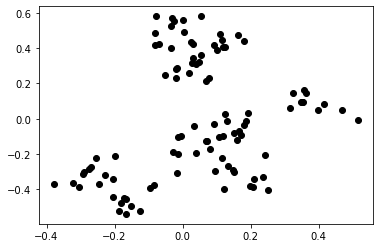

In [56]:
nIns = 2
# inputs = createData(100, nIns, 0.5)
inputs = createGroupedData(100, nIns, 0.5, 100//10, 0.1)
plt.plot(inputs[:,0], inputs[:,1], 'o', color='black');

Epoch
0


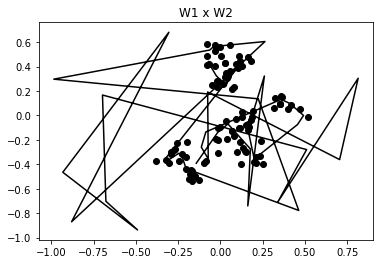

Epoch
10


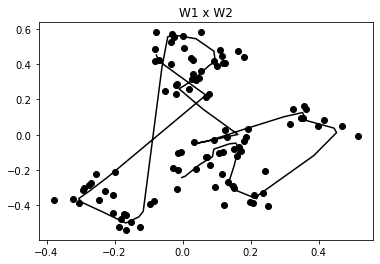

Epoch
20


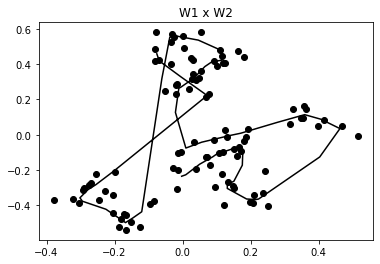

Epoch
30


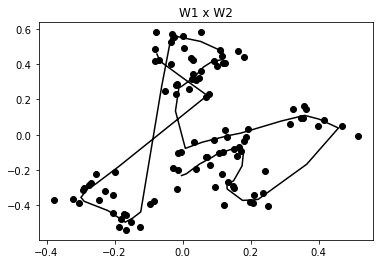

Epoch
40


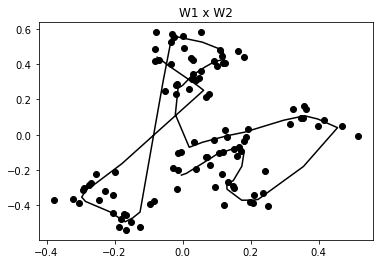

Epoch
50


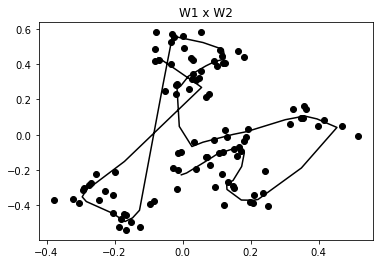

Epoch
60


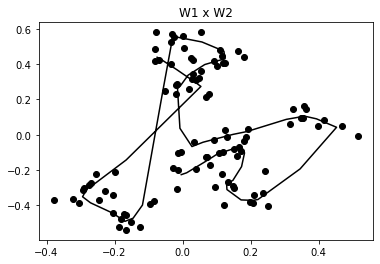

Epoch
70


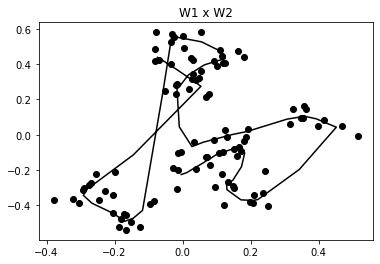

Epoch
80


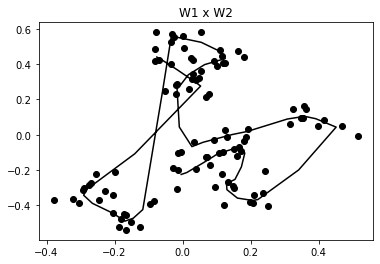

Epoch
90


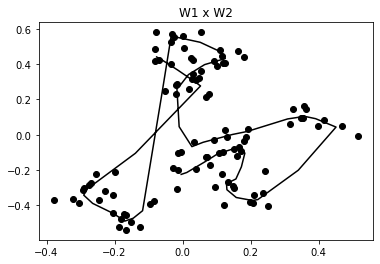

Epoch
100


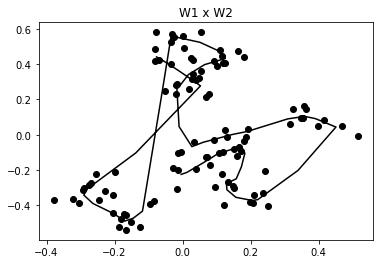

In [57]:
nOuts = 50
som  =  SOM(nIns, nOuts, 1, 0.5, 100)
som.cluster(inputs)